In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
book=("book.csv")

In [ ]:
# Issue in the CSV file reading, showing the Unicode Decode Error. 

In [10]:
# using the 
import chardet
with open(book, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7171222254531355, 'language': ''}

In [11]:
df = pd.read_csv(book,encoding = 'ISO-8859-1')
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [13]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [14]:
df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [22]:
df.rename({'User.ID': 'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},axis = 1, inplace = True)

In [65]:
df['Book_Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

C:\Users\PC-1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Book_Rating', ylabel='Density'>

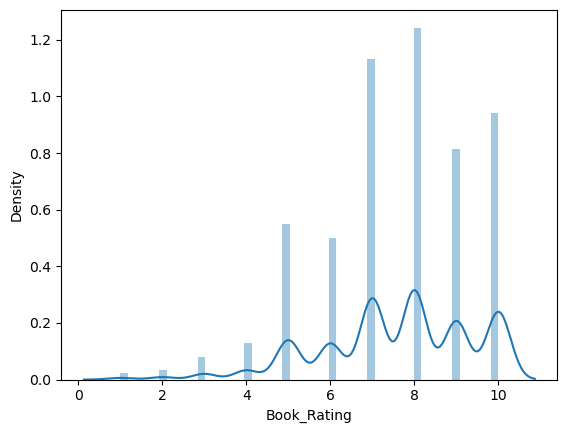

In [70]:
sns.distplot(df['Book_Rating'])


In [73]:
df['Book_Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [71]:
df['Book_Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book_Title, Length: 9659, dtype: int64

# Duplicated

In [23]:
#Print the duplicated rows
df[df.duplicated()]

,User_ID,Book_Title,Book_Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [24]:
# drop the Duplicated value (need to add reset_index function)

df1 =df.drop(df.index[[2152,3757]],axis=0).reset_index()

In [25]:
df1[df1.duplicated()]

,index,User_ID,Book_Title,Book_Rating


In [26]:
user_df2 = df1.pivot_table(index='User_ID',
                            columns = 'Book_Title',
                            values = 'Book_Rating').reset_index(drop = True)



In [27]:
user_df2

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# IMpute Null value with 0 values

user_df2.fillna(0,inplace = True)

In [29]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [48]:
user_sim = 1 - pairwise_distances( user_df2.values,metric='cosine')

In [49]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [50]:
user_sim.shape

(2182, 2182)

In [51]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [74]:
user_sim_df.head

<bound method NDFrame.head of         276726  276729  276736  276737  276744  276745  276747  276748  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276751  276754  ...  162085  162091  162092  162095  162103  162107  \
27

In [52]:
#Set the index and column names to user ids 
user_sim_df.index = df.User_ID.unique()
user_sim_df.columns = df.User_ID.unique()

In [53]:
user_sim_df.iloc[0:1,:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0


In [54]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]





,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [55]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [56]:
df1[(df1['User_ID']==276726) | (df1['User_ID']==162129)]


,index,User_ID,Book_Title,Book_Rating
0,0,276726,Classical Mythology,5
9997,9999,162129,Kids Say the Darndest Things,6
